### Installing necessary packages and libraries for data cleaning and wrangling.

In [185]:
!pip install pandas==1.1.5
clear_output()

In [186]:
!pip install pandasql
clear_output()

In [187]:
# Useful Imports
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output


## Looking at Austin, TX data.



Use .info() method to count the number of null objects in the datasets before cleaning. 

In [188]:
austin_311_df = pd.read_csv("Austin_TX_311.csv")
clear_output()

In [189]:
austin_permits_df = pd.read_csv("Austin_TX_Building_Permits.csv")
clear_output()

In [190]:
austin_operating_df = pd.read_csv("Austin_TX_Operating_Business_Licenses.csv")
clear_output()

### Austin 311 Call Data

In [191]:
austin_311_df = austin_311_df.dropna(axis=0)
clear_output()

In [192]:
# austin_311_df = austin_311_df.drop(columns = ['Method Received', "SR Status", "SR Location", "Street Number", "Status Change Date", "Last Update Date", "Street Name"])
austin_311_df = austin_311_df[["Service Request (SR) Number", "SR Description", "Created Date", "Close Date", "County", "Zip Code"]]
clear_output()

In [193]:
# Print ill-formated columns
for col in austin_311_df.columns:
    weird = (austin_311_df[[col]].applymap(type) != austin_311_df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(austin_311_df[weird]) > 0:
        print(col)
clear_output()

In [194]:
austin_311_df["Zip Code"] = austin_311_df["Zip Code"].apply(lambda x: int(x))
clear_output()

In [195]:
austin_311_df = austin_311_df[austin_311_df["SR Description"].str.contains("Traffic")]
austin_311_df = austin_311_df[austin_311_df["County"].str.contains("TRAVIS|WILLIAMSON")]
clear_output()

In [196]:
austin_311_df
clear_output()

### Visualizations

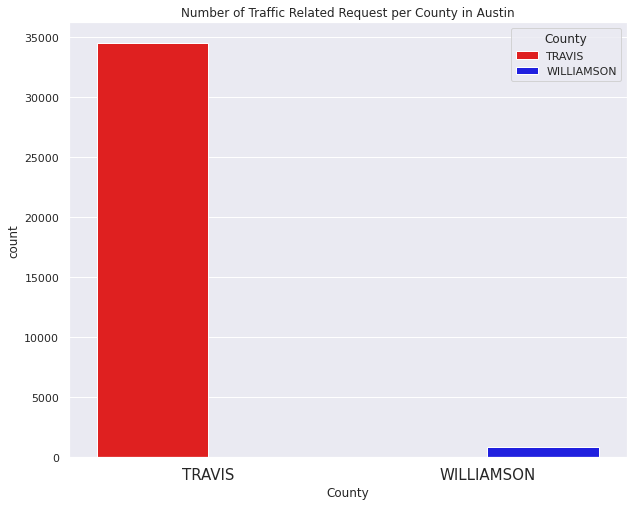

In [197]:
# County
sns.set(rc = {'figure.figsize':(10,8)})
plot = sns.countplot(x = "County", data = austin_311_df, hue = "County", palette = ["red", "blue"])
plot.set_xticklabels(plot.get_xticklabels(), size = 15)
plot.set(title = 'Number of Traffic Related Request per County in Austin')
clear_output()

In [ ]:
# SR Description
sns.set(rc = {'figure.figsize':(25,8)})
plot = sns.countplot(x = "SR Description", data = austin_311_df, hue = "County", palette = ["red", "blue"])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 15, size = 15)
plot.set(title = 'Traffic Related Requests by Description in Austin')
clear_output()

### Austin Permit Data

In [199]:
austin_permits_df = austin_permits_df[["Permit Num", "Fiscal Year Issued", "Original Zip"]]
austin_permits_df = austin_permits_df.dropna(axis = 0, subset = ["Original Zip"])
austin_permits_df["Original Zip"] = austin_permits_df["Original Zip"].apply(lambda x: int(x))
clear_output()

In [200]:
austin_permits_df.head()
clear_output()

In [201]:
# Print ill-formated columns
for col in austin_operating_df.columns:
    weird = (austin_operating_df[[col]].applymap(type) != austin_operating_df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(austin_operating_df[weird]) > 0:
        print(col)
clear_output()

In [202]:
austin_operating_df = austin_operating_df.dropna(axis = 0, subset = ["MAILING ADDRESS COUNTY", "MAILING ADDRESS ZIP", "BUSINESS CITY, STATE ZIP", "BUSINESS COUNTY"])
clear_output()

In [203]:
# Format bad columns
austin_operating_df[['BUSINESS CITY, STATE ZIP', "BUSINESS NAME", "LICENSE SUBTYPE"]] = austin_operating_df[['BUSINESS CITY, STATE ZIP', "BUSINESS NAME", "LICENSE SUBTYPE"]].applymap(lambda x: str(x))
austin_operating_df["MAILING ADDRESS ZIP"] = austin_operating_df["MAILING ADDRESS ZIP"].apply(lambda x: int(float(x)))
clear_output()

In [204]:
austin_operating_df["BUSINESS ZIP"] = austin_operating_df["BUSINESS CITY, STATE ZIP"].apply(lambda x: x[-5:])
clear_output()

In [205]:
austin_operating_df = austin_operating_df.drop(columns = ["MAILING ADDRESS CITY, STATE ZIP", "MAILING ADDRESS LINE1", "BUSINESS ADDRESS-LINE1", "LICENSE SUBTYPE", 
                                                          "MAILING ADDRESS COUNTY CODE", "BUSINESS CITY, STATE ZIP", "LICENSE EXPIRATION DATE (MMDDCCYY)"])
clear_output()

In [206]:
# Check ill-formatted columns again
for col in austin_operating_df.columns:
    weird = (austin_operating_df[[col]].applymap(type) != austin_operating_df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(austin_operating_df[weird]) > 0:
        print(col)
clear_output()

In [207]:
austin_operating_df
clear_output()

In [208]:
operating_311_df = austin_operating_df[(austin_operating_df["BUSINESS COUNTY"] == "TRAVIS") | (austin_operating_df["BUSINESS COUNTY"] == "WILLIAMSON")]
clear_output()

### Visualizations

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "BUSINESS COUNTY", data = operating_311_df, hue = "BUSINESS COUNTY", palette = ["red", "blue"])
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Businesses per County in Austin')
clear_output()

## New York Data

In [210]:
ny_permits_df = pd.read_csv("New_York_NY_Building_Permits.csv")
clear_output()

In [211]:
ny_operating_df = pd.read_csv("New_York_NY_Operating_Business_Licenses.csv")
clear_output()

### NY Permits Data

In [212]:
ny_permits_df = ny_permits_df[["BOROUGH", "Zip Code"]]
ny_permits_df = ny_permits_df.dropna(axis = 0)
ny_permits_df["Zip Code"] = ny_permits_df["Zip Code"].apply(lambda x: int(x))
clear_output()

In [213]:
ny_permits_df
clear_output()

### Visualization

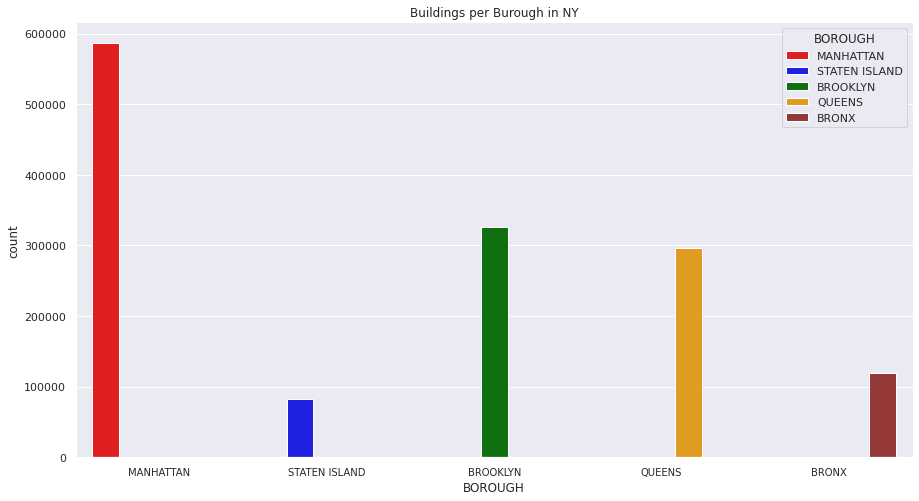

In [214]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "BOROUGH", data = ny_permits_df, hue = "BOROUGH", palette = ["red", "blue", "green", "orange", "brown"])
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Buildings per Burough in NY')
clear_output()

### NY Business Data

In [215]:
ny_operating_df = ny_operating_df[["DCA License Number", "Address Borough", "Address ZIP"]]
clear_output()

In [216]:
ny_operating_df = ny_operating_df.dropna(axis = 0, subset = ["Address Borough"])
clear_output()

In [217]:
ny_operating_df["Address Borough"] = ny_operating_df["Address Borough"].apply(lambda x: x.upper())
clear_output()

In [218]:
ny_operating_df
clear_output()

### Visualization

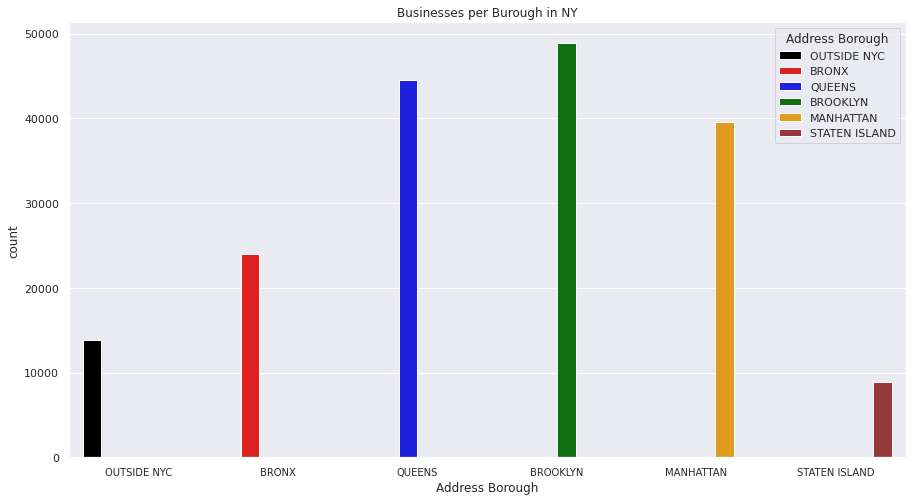

In [219]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "Address Borough", data = ny_operating_df, hue = "Address Borough", palette = ["black", "red", "blue", "green", "orange", "brown"])
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Businesses per Burough in NY')
clear_output()

# DC Data

In [220]:
dc_311_df = pd.read_csv("Washington_DC_311_2021_2022.csv")
dc_311_df.head(1)
clear_output()

In [221]:
dc_311_df = dc_311_df[["SERVICECODE", "SERVICECODEDESC", "SERVICETYPECODEDESC", "ADDDATE", "SERVICEDUEDATE", "ZIPCODE", "WARD"]]
clear_output()

In [222]:
print(dc_311_df["SERVICETYPECODEDESC"].unique())
clear_output()

In [223]:
dc_311_df = dc_311_df.dropna(axis = 0, subset = ["SERVICETYPECODEDESC", "SERVICECODEDESC", "WARD", "ZIPCODE"])
dc_311_df = dc_311_df[dc_311_df["SERVICETYPECODEDESC"].str.contains("Transportation|Parking|Vehicle")]
dc_311_df = dc_311_df[~dc_311_df["SERVICECODEDESC"].str.contains("DMV|Abandoned|Striping|Out")]
dc_311_df[["ZIPCODE", "WARD"]] = dc_311_df[["ZIPCODE", "WARD"]].applymap(lambda x: int(x))
dc_311_df = dc_311_df[~dc_311_df["SERVICECODEDESC"].str.contains("DMV")]
clear_output()

In [224]:
print(dc_311_df["SERVICECODEDESC"].unique())
clear_output()

In [225]:
dc_311_df
clear_output()

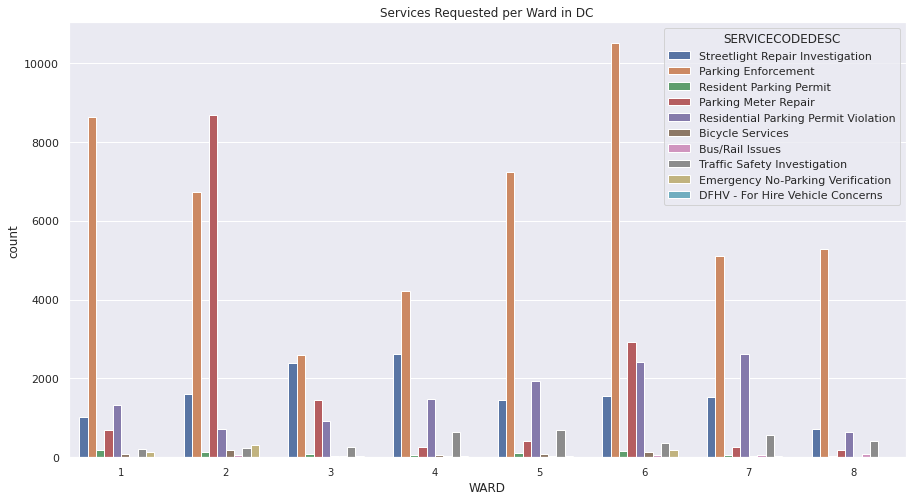

In [226]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "WARD", data = dc_311_df, hue = "SERVICECODEDESC")
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Services Requested per Ward in DC')
clear_output()

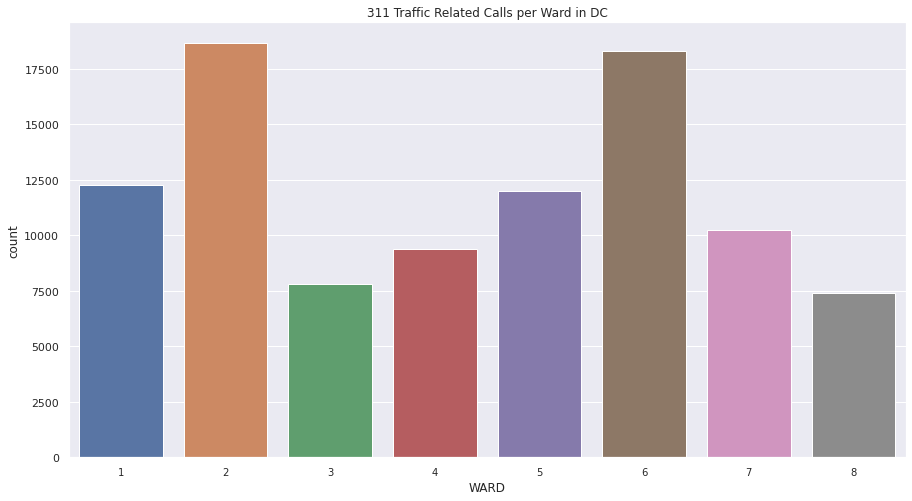

In [227]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "WARD", data = dc_311_df)
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = '311 Traffic Related Calls per Ward in DC')
clear_output()

In [229]:
dc_permits_df = pd.read_csv("Washington_DC_Building_Permits_2021_2022.csv")
dc_permits_df.head(2)
clear_output()

In [230]:
dc_permits_df = dc_permits_df[["DCRAINTERNALNUMBER", "ZONING", "WARD", "DISTRICT"]]
dc_permits_df = dc_permits_df.dropna(axis = 0, subset = ["DISTRICT", "WARD"])
dc_permits_df = dc_permits_df.sort_values(axis = 0, by = "WARD")
clear_output()

In [231]:
dc_permits_df.head(20)
clear_output()

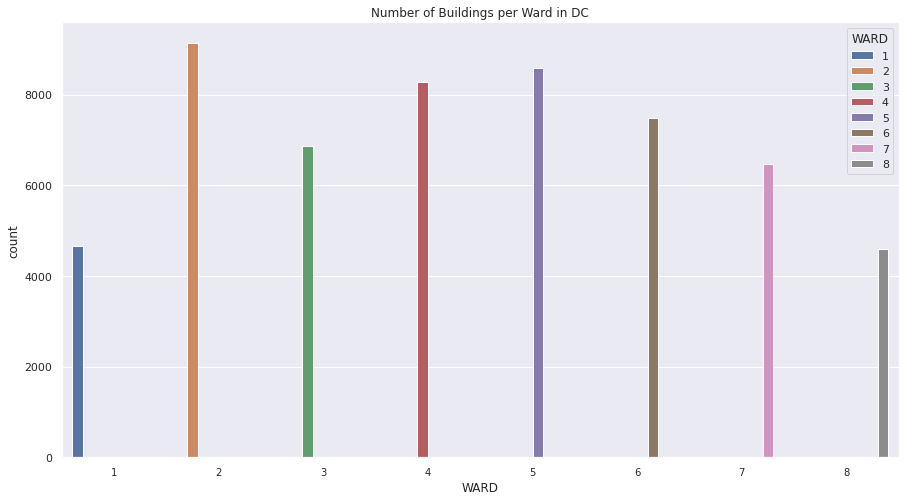

In [232]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "WARD", data = dc_permits_df, hue = "WARD")
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Number of Buildings per Ward in DC')
clear_output()

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "DISTRICT", data = dc_permits_df, hue = "DISTRICT")
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Number of Buildings in DC per District')
clear_output()

In [234]:
dc_operating_df = pd.read_csv("Washington_DC_Operating_Business_Licenses.csv")
dc_operating_df.head(2)
clear_output()

In [235]:
dc_operating_df = dc_operating_df[["CUSTOMER_NUMBER", "DC_ADDR_FLAG", "ZIP", "WARD", "DISTRICT"]]
dc_operating_df = dc_operating_df.dropna(axis = 0, subset = ["CUSTOMER_NUMBER", "DC_ADDR_FLAG", "WARD", "DISTRICT"])
dc_operating_df["WARD"] = dc_operating_df["WARD"].apply(lambda x: int(x))
dc_operating_df = dc_operating_df.sort_values(axis = 0, by = "WARD")
dc_operating_df = dc_operating_df[dc_operating_df["DC_ADDR_FLAG"] == "Y"]
clear_output()

In [236]:
dc_operating_df
clear_output()

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "DISTRICT", data = dc_operating_df, hue = "DISTRICT")
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Number of Businesses per District in DC')
clear_output()

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.countplot(x = "WARD", data = dc_operating_df, hue = "WARD")
plot.set_xticklabels(plot.get_xticklabels(), size = 10)
plot.set(title = 'Number of Businesses per Ward in DC')
clear_output()